=== UNDERSTANDING TRADING CONCEPTS ===

1. np.random is a MODULE (collection of functions) in NumPy
   Functions inside np.random:
   - np.random.normal() → generates random numbers
   - np.random.seed() → makes randomness predictable
   - np.random.choice() → picks random items

Examples:
Random number: -1.086
Random choice: up
Random integers: [3 7 2]

2. MOVING AVERAGE - Simple Example
Stock prices over 7 days: [100, 102, 98, 105, 103, 107, 101]

3-day Moving Average calculation:
Day 3: Average of [100 102  98] = 100.0
Day 4: Average of [102  98 105] = 101.7
Day 5: Average of [ 98 105 103] = 102.0
Day 6: Average of [105 103 107] = 105.0
Day 7: Average of [103 107 101] = 103.7

Using NumPy: [100.  101.7 102.  105.  103.7]

Why moving averages? They smooth out daily ups/downs to show trends!

3. CUMULATIVE PRICE CHANGES
Think of it like a growing snowball effect...
Daily changes: +2%, -1%, +3%, -0.5%, +1.5%

Cumulative effect (compound growth):
Day 1: +2.0% → Price becomes $102.00
Day

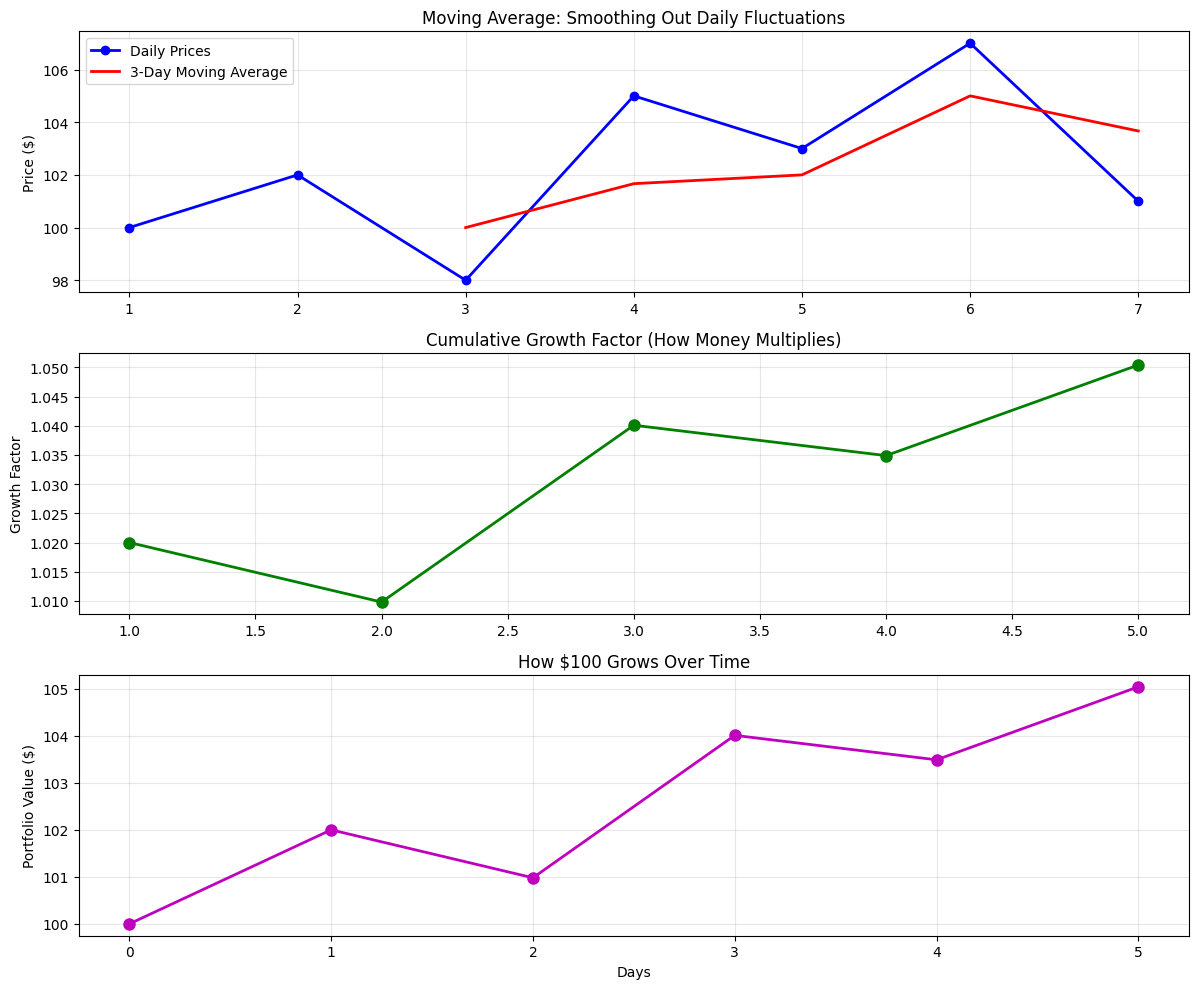


=== SIMPLE ANALOGY ===
Moving Average = Like taking your average test score over the last 3 tests
Cumulative Changes = Like a bank account where interest compounds daily
np.random = Like a dice-rolling machine with many different types of dice!


In [4]:
import numpy as np
import matplotlib.pyplot as plt

print("=== UNDERSTANDING TRADING CONCEPTS ===\n")

# 1. What is np.random?
print("1. np.random is a MODULE (collection of functions) in NumPy")
print("   Functions inside np.random:")
print("   - np.random.normal() → generates random numbers")
print("   - np.random.seed() → makes randomness predictable")
print("   - np.random.choice() → picks random items\n")

# Example of different random functions
np.random.seed(123)  # Makes results repeatable
print("Examples:")
print(f"Random number: {np.random.normal():.3f}")
print(f"Random choice: {np.random.choice(['up', 'down'])}")
print(f"Random integers: {np.random.randint(1, 10, 3)}\n")

# 2. Moving Average Explained
print("2. MOVING AVERAGE - Simple Example")
print("Stock prices over 7 days: [100, 102, 98, 105, 103, 107, 101]")
prices = np.array([100, 102, 98, 105, 103, 107, 101])

print("\n3-day Moving Average calculation:")
for i in range(2, len(prices)):  # Start from day 3
    window = prices[i-2:i+1]  # Last 3 days including today
    avg = np.mean(window)
    print(f"Day {i+1}: Average of {window} = {avg:.1f}")

# Using NumPy's efficient method
ma_3day = np.convolve(prices, np.ones(3)/3, mode='valid')
print(f"\nUsing NumPy: {ma_3day.round(1)}")

print("\nWhy moving averages? They smooth out daily ups/downs to show trends!")

# 3. Cumulative Price Changes
print("\n3. CUMULATIVE PRICE CHANGES")
print("Think of it like a growing snowball effect...")

daily_changes = np.array([0.02, -0.01, 0.03, -0.005, 0.015])  # Daily % changes
print("Daily changes: +2%, -1%, +3%, -0.5%, +1.5%")

print("\nCumulative effect (compound growth):")
cumulative = np.cumprod(1 + daily_changes)
start_price = 100

for i, (daily, cum) in enumerate(zip(daily_changes, cumulative)):
    new_price = start_price * cum
    print(f"Day {i+1}: {daily*100:+.1f}% → Price becomes ${new_price:.2f}")

print(f"\nTotal effect: ${start_price} → ${start_price * cumulative[-1]:.2f}")
print("This is why compound interest is powerful!")

# Visual example
plt.figure(figsize=(12, 10))

# Plot 1: Moving Average Example
plt.subplot(3, 1, 1)
days = np.arange(1, len(prices)+1)
plt.plot(days, prices, 'bo-', label='Daily Prices', linewidth=2)
plt.plot(days[2:], ma_3day, 'r-', label='3-Day Moving Average', linewidth=2)
plt.title('Moving Average: Smoothing Out Daily Fluctuations')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cumulative Effect
plt.subplot(3, 1, 2)
days_cum = np.arange(1, len(cumulative)+1)
plt.plot(days_cum, cumulative, 'go-', linewidth=2, markersize=8)
plt.title('Cumulative Growth Factor (How Money Multiplies)')
plt.ylabel('Growth Factor')
plt.grid(True, alpha=0.3)

# Plot 3: Actual Price Growth
plt.subplot(3, 1, 3)
actual_prices = start_price * np.concatenate([[1], cumulative])
all_days = np.arange(len(actual_prices))
plt.plot(all_days, actual_prices, 'mo-', linewidth=2, markersize=8)
plt.title('How $100 Grows Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== SIMPLE ANALOGY ===")
print("Moving Average = Like taking your average test score over the last 3 tests")
print("Cumulative Changes = Like a bank account where interest compounds daily")
print("np.random = Like a dice-rolling machine with many different types of dice!")